In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
dataset.shape

(768, 9)

In [35]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

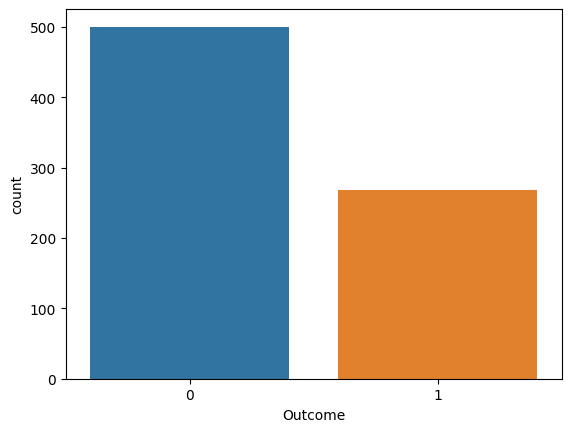

In [36]:
sns.countplot(x = 'Outcome',data = dataset)

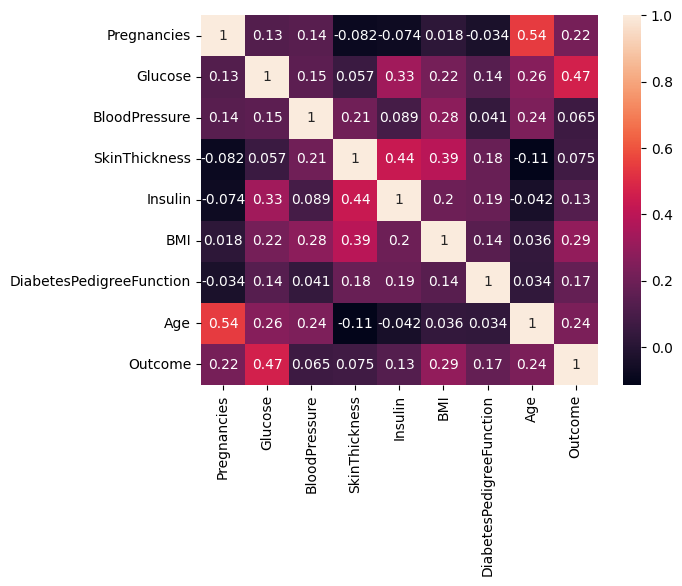

In [37]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [38]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[: , -1].values

In [40]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [42]:
x_train.shape

(614, 8)

In [43]:
x_test.shape

(154, 8)

In [44]:
from sklearn.preprocessing import StandardScaler #feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
x_train[0]

array([0.90832902, 0.91569367, 0.44912368, 0.52222619, 0.3736349 ,
       0.37852648, 0.67740401, 1.69955804])

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, metric = "minkowski")
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [47]:
y_pred = knn.predict(x_test)

In [48]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

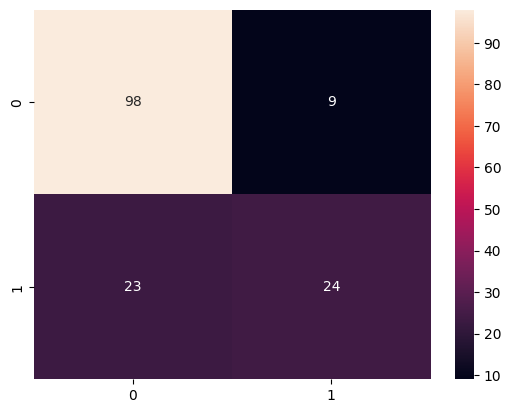

In [49]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(c_mat, annot = True)

In [50]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_pred)
print(knn_acc)

0.7922077922077922


In [51]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
X_train_prediction = classifier.predict(x_test)
data_accuracy = accuracy_score(y_test,X_train_prediction)
print('Accuracy: ', data_accuracy)

Accuracy:  0.8246753246753247


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42,max_depth=5)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.7922077922077922


In [53]:
from xgboost import XGBClassifier
model_1 = XGBClassifier(random_state = 42, max_depth=5,learning_rate=0.001, n_estimators=1000)
model_1.fit(x_train,y_train)
x_pred_1 = model_1.predict(x_test)
xg_acc=accuracy_score(y_test,x_pred_1)
print(xg_acc)

0.8051948051948052


In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score#knn
	
print('Precision: %.3f' % precision_score(y_test, y_pred))
	
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.727
Recall: 0.511
F1 Score: 0.600


In [55]:
print('Precision: %.3f' % precision_score(y_test, X_train_prediction)) #svm
	
print('Recall: %.3f' % recall_score(y_test, X_train_prediction))
print('F1 Score: %.3f' % f1_score(y_test, X_train_prediction))

Precision: 0.763
Recall: 0.617
F1 Score: 0.682


In [56]:
print('Precision: %.3f' % precision_score(y_test, predictions)) #RandomForest
	
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Precision: 0.692
Recall: 0.574
F1 Score: 0.628


In [57]:
print('Precision: %.3f' % precision_score(y_test, x_pred_1)) #XGBoost
	
print('Recall: %.3f' % recall_score(y_test, x_pred_1))
print('F1 Score: %.3f' % f1_score(y_test, x_pred_1))

Precision: 0.689
Recall: 0.660
F1 Score: 0.674


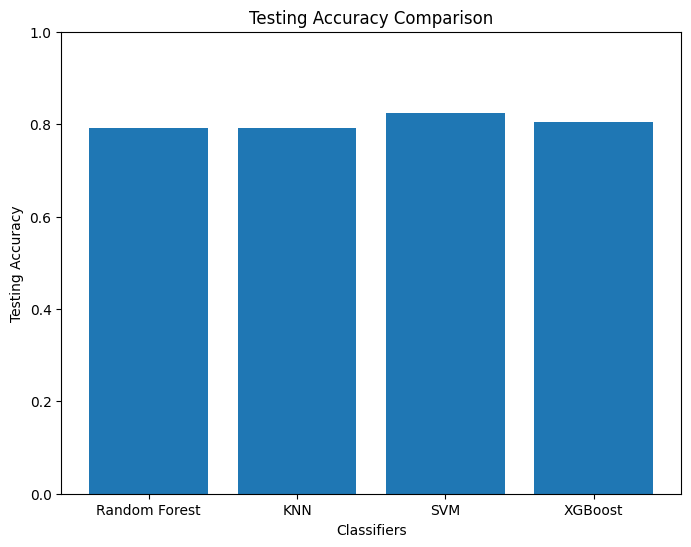

In [59]:
classifiers = ['Random Forest', 'KNN','SVM' ,'XGBoost']
test_accuracy = [accuracy,knn_acc, data_accuracy,xg_acc]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, test_accuracy)
plt.xlabel('Classifiers')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()

In [60]:
import pickle
pickle.dump(knn, open('classifier.pkl','wb'))

In [61]:
pickle.dump(sc, open('sc.pkl','wb'))